# **Title: Multiple Linear Regression in Python and R**

Lab Objectives:
* To effectively use libraries for data analytics.
* To understand the use of regression Techniques in data analytics applications.

Lab Outcome(LO): Implement various Regression techniques for prediction. (LO2)


## **Python**

### Packages for Simple Linear Regression
* NumPy is a fundamental Python scientific package that allows many high-performance operations on single-dimensional and multidimensional arrays. It also offers many mathematical routines.
* The scikit-learn package is a widely used Python library for machine learning, built on top of NumPy and some other packages. It provides the means for preprocessing data, reducing dimensionality, implementing regression, classifying, clustering, and more.
* matplotlib provides a wide range of static, animated, and interactive plots, while seaborn is built on top of matplotlib and offers a high-level interface for statistical graphics.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mpl_toolkits.mplot3d import Axes3D

## Load Dataset
## **[Kaggle Dataset Link](https://www.kaggle.com/datasets/yasserh/song-popularity-dataset)**

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/song_data.csv')

In [3]:
print(data.info(),'\n',data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB
None 
        song_popularity 

In [4]:
print(data.isna().sum())

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64


In [5]:
data.dropna(axis=0,inplace=True)
data = data.sample(frac=1).reset_index(drop=True)

### Checking Correlation of all Variables

<ipython-input-6-da177aa85c7b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


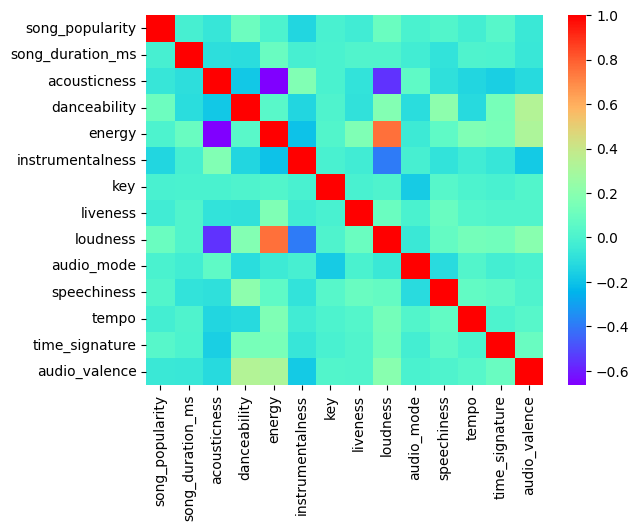

In [6]:
corr = data.corr()

sb.heatmap(corr, cmap='rainbow',fmt = '.2f')
pot.show()

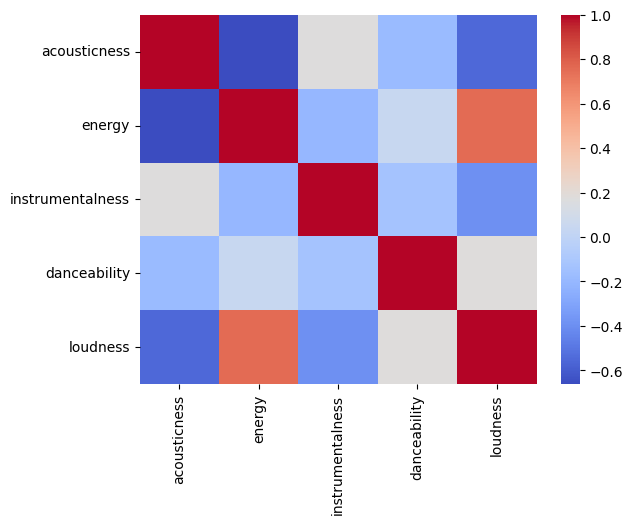

In [7]:
features = data[['acousticness','energy','instrumentalness','danceability','loudness']]

feature_corr = features.corr()

sb.heatmap(feature_corr, cmap='coolwarm',fmt = '.2f')
pot.show()

In [8]:
x = data[['acousticness','energy']]
y = data[['loudness']]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25 ,random_state=42)

### Multiple Linear Regression

In [10]:
regress = LinearRegression()
regress.fit(x_train, y_train)

LinearRegression()

In [11]:
prediction = regress.predict(x_test)

print('Mean Squared Error: ',mean_squared_error(prediction,y_test))
print('Mean Absolute Error: ',mean_absolute_error(prediction,y_test))

Mean Squared Error:  6.064054097738206
Mean Absolute Error:  1.7948959427096083


In [12]:
print('Coefficient of Determination(R): ',r2_score(prediction,y_test))
print('Intercept(B0): ', regress.intercept_)
print('Coefficients: ',regress.coef_)

Coefficient of Determination(R):  0.2764813338726979
Intercept(B0):  [-15.10783876]
Coefficients:  [[-1.30427144 12.38088416]]


### Visualizing Results

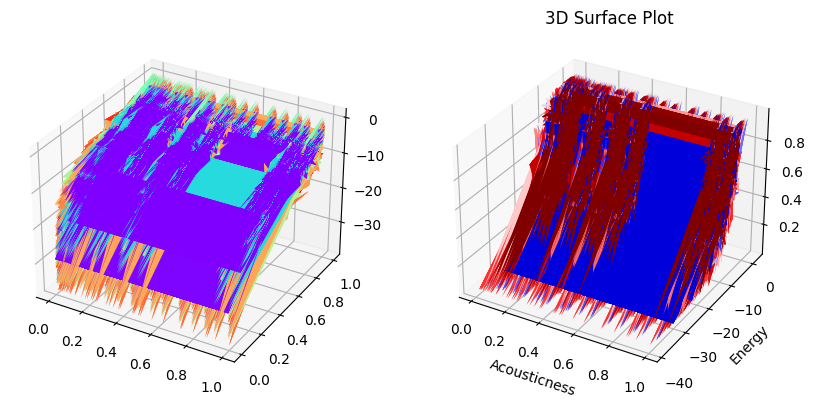

In [13]:
x1 = x['acousticness']
x2 = x[['energy']]
Y = y[['loudness']]

fig = pot.figure(figsize=(10,8))
ax = fig.add_subplot(1,2,1, projection='3d')
ax.plot_surface(x1, x2, Y, cmap='rainbow')

ax = fig.add_subplot(1,2,2, projection='3d')
ax.plot_surface(x1, y, x2, cmap='seismic')

ax.set_xlabel('Acousticness')
ax.set_ylabel('Energy')
ax.set_zlabel('Loudness')
pot.title('3D Surface Plot')

pot.show()

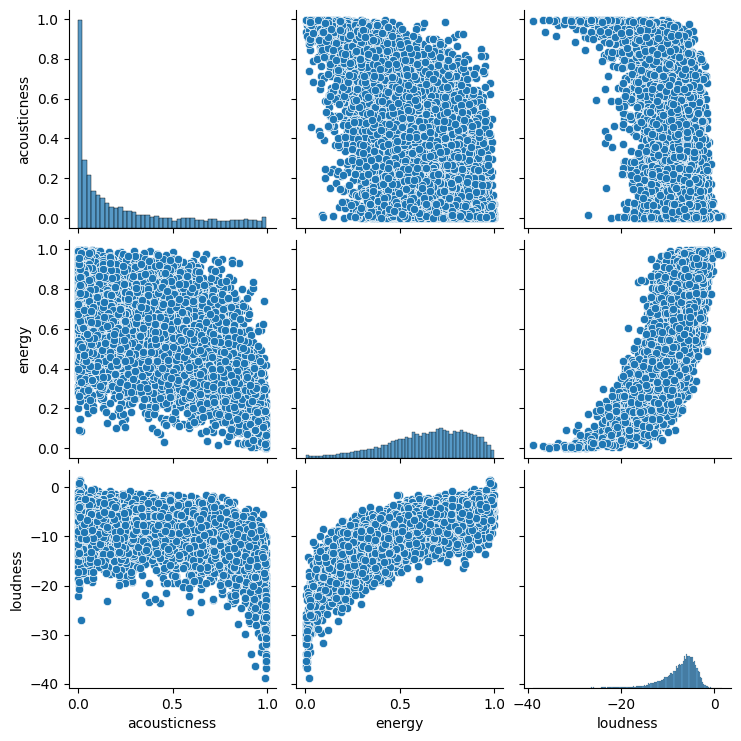

In [14]:
data = pd.concat([x,y])

sb.pairplot(data)
pot.show()

## **R**
### Package for Simple Linear Regression

* lm: The lm library in R provides a suite of functions for fitting linear regression models, allowing users to estimate relationships between variables and make predictions based on ordinary least squares methodology.

* ggplot2: With its intuitive syntax and powerful graphical capabilities, the ggplot2 library enables users to create visually appealing and customizable data visualizations, making it a popular choice for exploratory data analysis and presentation-quality graphics in R.

* dplyr: As a versatile and efficient data manipulation tool, the dplyr library offers a suite of functions for filtering, selecting, summarizing, and mutating data frames, streamlining the data wrangling process and enhancing reproducibility in R workflows.

* broom: The broom library simplifies the process of tidying and summarizing model output in R by converting complex model objects into tidy data frames, facilitating easier interpretation and downstream analysis of statistical models.






In [1]:
install.packages("GGally")
library(GGally)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



## Load Dataset

In [2]:
data <- read.csv('/content/drive/MyDrive/Dataset/song_data.csv')
str(data)
summary(data)

'data.frame':	18835 obs. of  15 variables:
 $ song_name       : chr  "Boulevard of Broken Dreams" "In The End" "Seven Nation Army" "By The Way" ...
 $ song_popularity : int  73 66 76 74 56 80 81 76 80 81 ...
 $ song_duration_ms: int  262333 216933 231733 216933 223826 235893 199893 213800 222586 203346 ...
 $ acousticness    : num  0.00552 0.0103 0.00817 0.0264 0.000954 0.00895 0.000504 0.00148 0.00108 0.00172 ...
 $ danceability    : num  0.496 0.542 0.737 0.451 0.447 0.316 0.581 0.613 0.33 0.542 ...
 $ energy          : num  0.682 0.853 0.463 0.97 0.766 0.945 0.887 0.953 0.936 0.905 ...
 $ instrumentalness: num  2.94e-05 0.00 4.47e-01 3.55e-03 0.00 1.85e-06 1.11e-03 5.82e-04 0.00 1.04e-02 ...
 $ key             : int  8 3 0 0 10 4 4 2 1 9 ...
 $ liveness        : num  0.0589 0.108 0.255 0.102 0.113 0.396 0.268 0.152 0.0926 0.136 ...
 $ loudness        : num  -4.09 -6.41 -7.83 -4.94 -5.07 ...
 $ audio_mode      : int  1 0 1 1 1 0 0 1 1 1 ...
 $ speechiness     : num  0.0294 0.0498 0.0

  song_name         song_popularity  song_duration_ms   acousticness     
 Length:18835       Min.   :  0.00   Min.   :  12000   Min.   :0.000001  
 Class :character   1st Qu.: 40.00   1st Qu.: 184340   1st Qu.:0.024100  
 Mode  :character   Median : 56.00   Median : 211306   Median :0.132000  
                    Mean   : 52.99   Mean   : 218212   Mean   :0.258539  
                    3rd Qu.: 69.00   3rd Qu.: 242844   3rd Qu.:0.424000  
                    Max.   :100.00   Max.   :1799346   Max.   :0.996000  
  danceability        energy        instrumentalness         key        
 Min.   :0.0000   Min.   :0.00107   Min.   :0.0000000   Min.   : 0.000  
 1st Qu.:0.5330   1st Qu.:0.51000   1st Qu.:0.0000000   1st Qu.: 2.000  
 Median :0.6450   Median :0.67400   Median :0.0000114   Median : 5.000  
 Mean   :0.6333   Mean   :0.64499   Mean   :0.0780080   Mean   : 5.289  
 3rd Qu.:0.7480   3rd Qu.:0.81500   3rd Qu.:0.0025700   3rd Qu.: 8.000  
 Max.   :0.9870   Max.   :0.99900   Max.   :

## Multiple Regression Model

In [3]:
model <- lm(loudness ~ acousticness + energy, data = data)

summary(model)


Call:
lm(formula = loudness ~ acousticness + energy, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.622  -1.173   0.271   1.585   8.230 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -15.03275    0.09072 -165.71   <2e-16 ***
acousticness  -1.34989    0.08394  -16.08   <2e-16 ***
energy        12.30136    0.11319  108.68   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.491 on 18832 degrees of freedom
Multiple R-squared:  0.5766,	Adjusted R-squared:  0.5766 
F-statistic: 1.282e+04 on 2 and 18832 DF,  p-value: < 2.2e-16


In [4]:
cat("Coefficient of Determination(R): ", summary(model)$r.squared, "\n")

cat("Intercept: ", coef(model)[1], "\n")

cat("Coefficients: \n")
print(coef(model)[-1])

Coefficient of Determination(R):  0.5766185 
Intercept:  -15.03275 
Coefficients: 
acousticness       energy 
   -1.349887    12.301359 


## Visualize Results

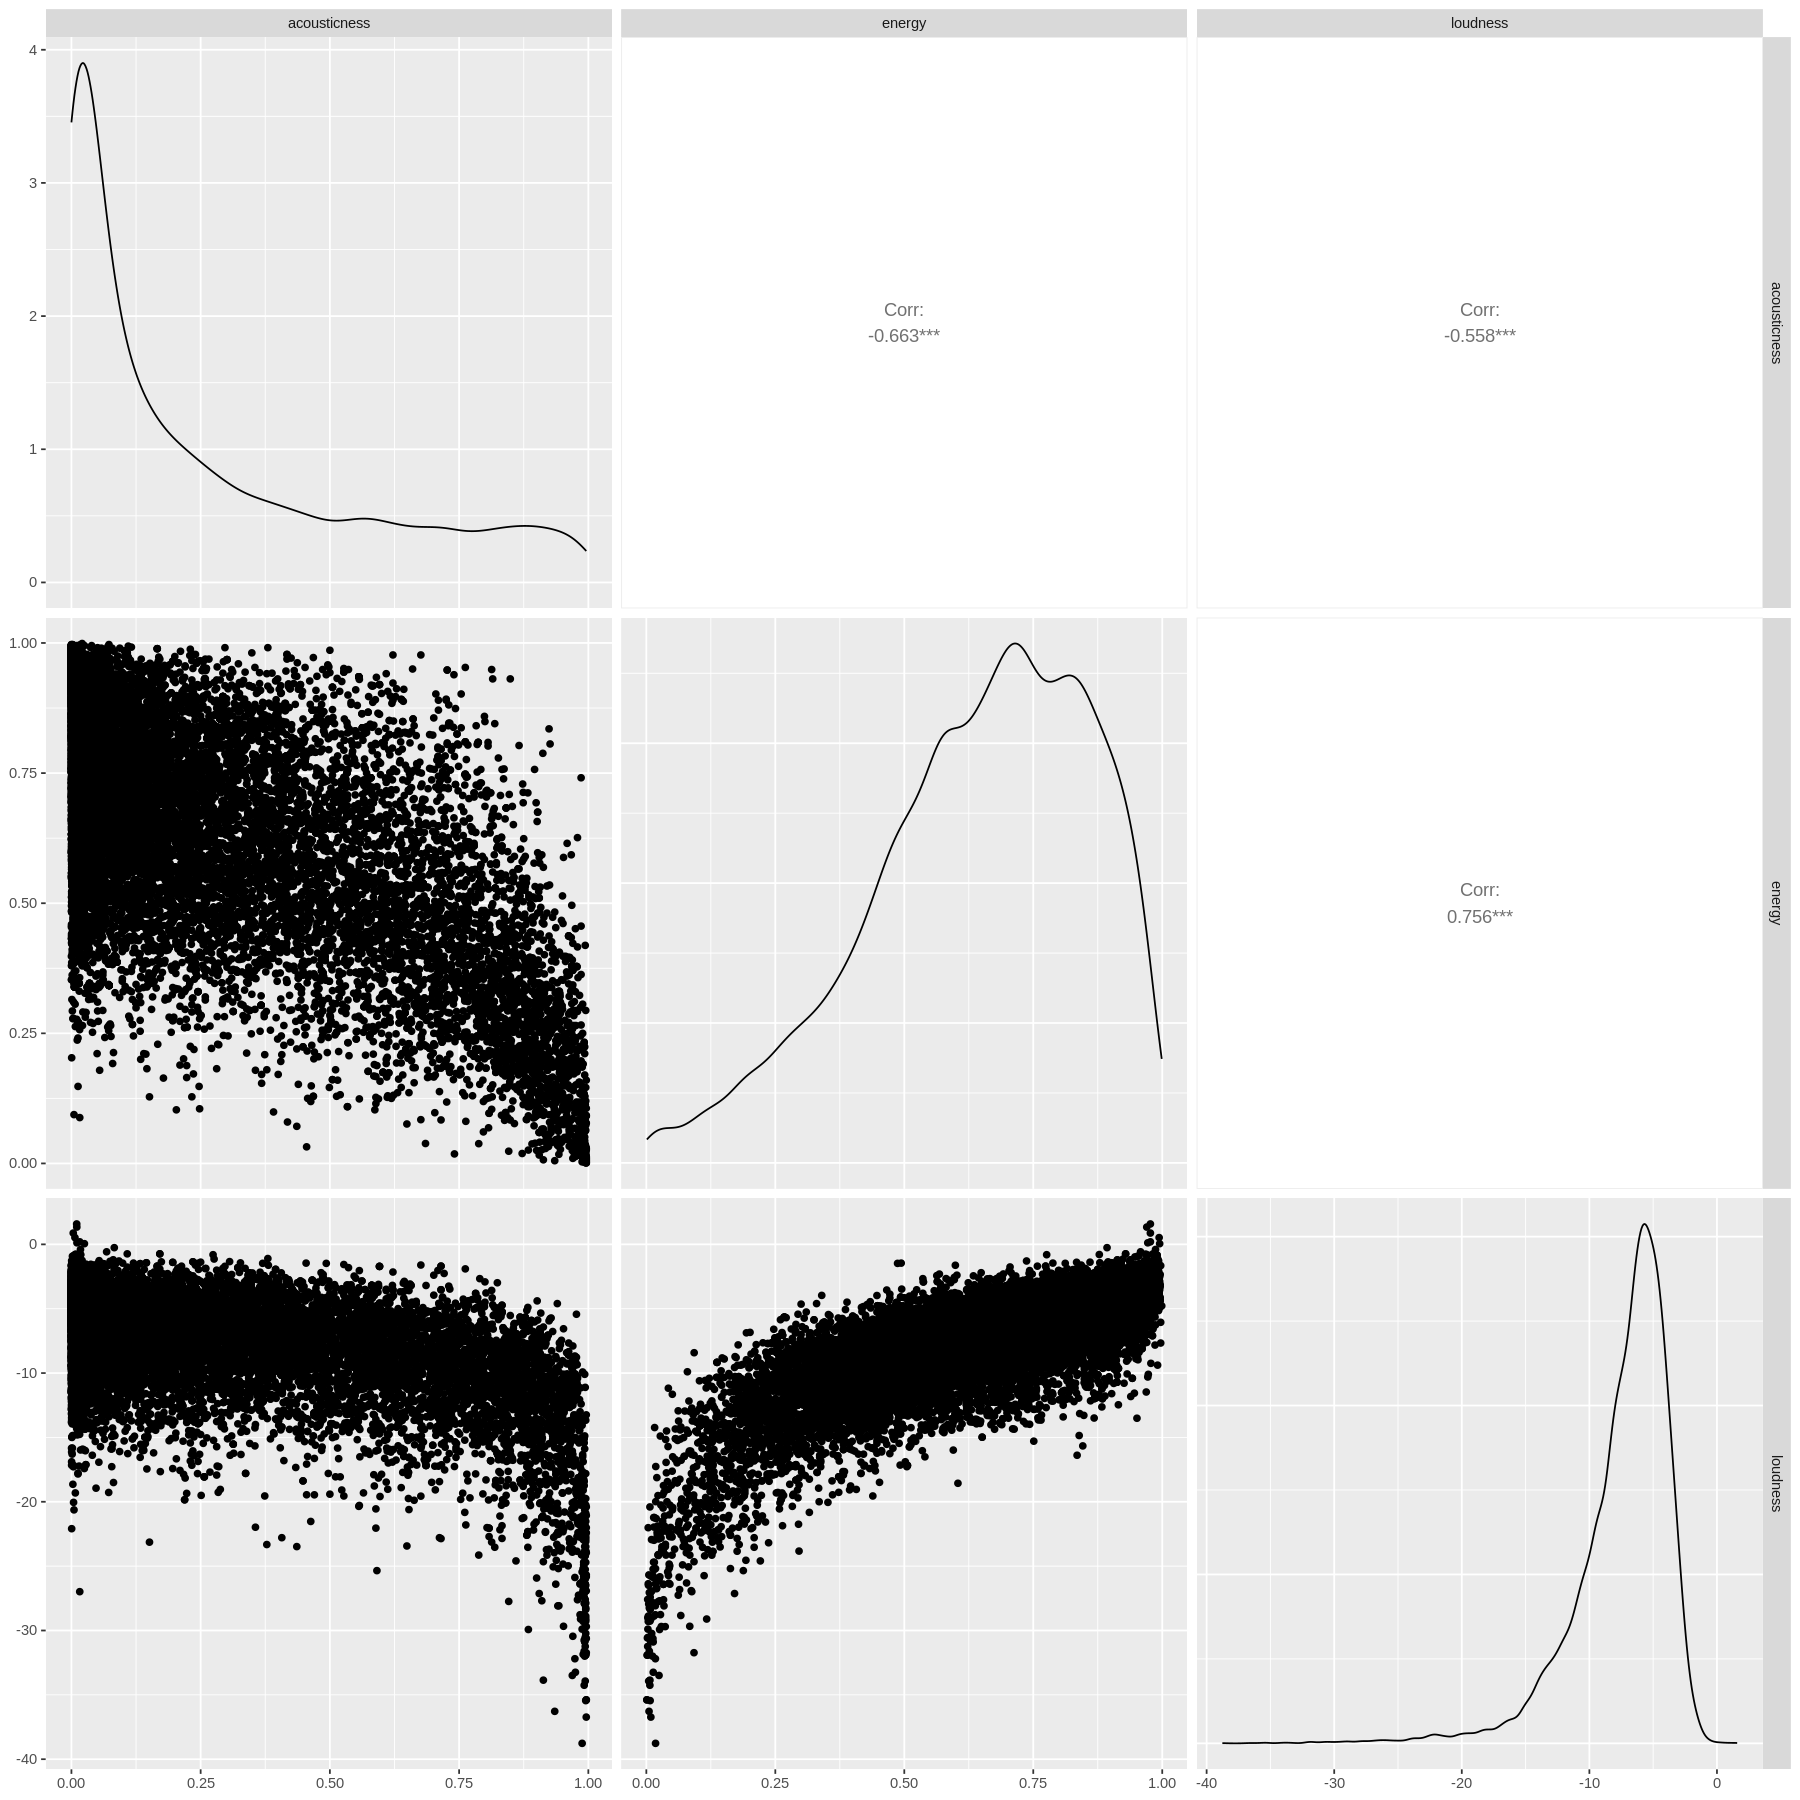

In [5]:
options(repr.plot.width = 15, repr.plot.height =15)

ggpairs(data = data[, c("acousticness","energy","loudness")])

## Conclusion

We have succcessfully studied an implemented multiple linear regression using Python and R, along with the visualization of the results, provided valuable insights into the relationship between multiple independent variables and a target variable.